In [1]:
from bs4 import BeautifulSoup
import urllib as ul
from selenium import webdriver
import pandas as pd
import re
from selenium.webdriver.chrome.options import Options
opts = Options()
opts.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0')

In [2]:
import seaborn as sns
import spacy
from wordcloud import WordCloud

In [54]:
import nltk


In [3]:
browser = webdriver.Chrome(executable_path='/home/kinshuk/Downloads/chromedriver', options=opts)

In [4]:
data = {'intro':[],'links':[]}

for i in range(1,10):
    address='https://www.thehindu.com/news/national/?page='+str(i)
    doc = ul.request.urlopen(address)
    print(address)
    browser.get(address)
    containers = [x.get_attribute('innerHTML') for x in browser.find_elements_by_xpath("//a[@class='light-gray-color Other-StoryCard-text hidden-xs']")]
    soup = BeautifulSoup(doc,"lxml")
    links = soup.findAll('div', attrs={'class':'Other-StoryCard'})
    for link in links:
        data['links'].append(link.find('a').get('href'))
    for container in containers:
        data['intro'].append(container)
        
    
   
    

https://www.thehindu.com/news/national/?page=1
https://www.thehindu.com/news/national/?page=2
https://www.thehindu.com/news/national/?page=3
https://www.thehindu.com/news/national/?page=4
https://www.thehindu.com/news/national/?page=5
https://www.thehindu.com/news/national/?page=6
https://www.thehindu.com/news/national/?page=7
https://www.thehindu.com/news/national/?page=8
https://www.thehindu.com/news/national/?page=9


In [5]:
Data_12Feb_hindu=pd.DataFrame(data)


In [6]:
Data_12Feb_hindu.head()

,intro,links
0,\nThe purported email cited by Rahul Gandhi wa...,https://www.thehindu.com/news/national/relianc...
1,\nA senior officer says on condition of anonym...,https://www.thehindu.com/news/national/no-sove...
2,\nHe also lays foundation stones for four deve...,https://www.thehindu.com/news/national/modi-in...
3,\nAssembly elections held close to the Lok Sab...,https://www.thehindu.com/news/national/assembl...
4,\nFor disobeying its order to not transfer Joi...,https://www.thehindu.com/news/national/supreme...


In [7]:
#Data_12Feb_hindu.to_csv('Data_12Feb_hindu.csv', index = False)

In [8]:
day =Data_12Feb_hindu

articles={'text':[]}
for article in day:
    for x in ['modi', 'bjp', 'rahul', 'gandhi','congress']:
        for row in range(len(day)):
            if re.findall(x,day['intro'].str.lower()[row]):
                   
                try:
                        article_address = day['links'][row]
                        print(article_address)
                        doc_article = ul.request.urlopen(article_address)
                        browser.get(article_address)
                        containers = [x.get_attribute('innerHTML') for x in browser.find_elements_by_xpath("//div[@class='_yeti_done']")]
                        #containers1 = [x.get_attribute('innerHTML') for x in containers.("//p")]
                        articles['text'].append(containers)
                       # for link in links:
                        #print(link.find('p').get(""))              

                except:
                    continue
            
            text=pd.DataFrame(articles)

https://www.thehindu.com/news/national/train-18s-delhi-varanasi-ac-chair-car-ticket-to-cost-1850-executive-class-3520/article26237476.ece
https://www.thehindu.com/news/national/modi-did-not-follow-raj-dharma-in-aps-case-says-chandrababu-naidu/article26235368.ece
https://www.thehindu.com/news/national/rafale-row-a-non-issue-for-the-voter-says-goyal/article26225913.ece
https://www.thehindu.com/news/national/news-analysis-five-features-of-the-modi-speech/article26206552.ece
https://www.thehindu.com/news/national/rahul-launches-a-fresh-offensive-against-modi/article26203675.ece
https://www.thehindu.com/news/national/narendra-modi-to-flag-off-vande-bharat-express-from-new-delhi-railway-station-on-feb-15/article26200430.ece
https://www.thehindu.com/news/national/internet-services-snapped-in-srinagar-ahead-of-pms-visit/article26166768.ece
https://www.thehindu.com/news/national/cbi-chief-appointment-congress-leader-mallikarjun-kharge-sends-dissent-note-to-pmo/article26163032.ece
https://www.th

https://www.thehindu.com/news/national/rahul-launches-a-fresh-offensive-against-modi/article26203675.ece
https://www.thehindu.com/news/national/court-nod-to-chidambaram-on-new-papers/article26196585.ece
https://www.thehindu.com/news/national/i-stand-by-my-husband-says-priyanka/article26193948.ece
https://www.thehindu.com/news/national/reclaiming-the-republic-civil-society-group-sets-agenda-for-poll/article26188035.ece
https://www.thehindu.com/news/national/trinamool-bjp-exposed-says-yechury/article26187124.ece
https://www.thehindu.com/news/national/rahul-gandhi-to-meet-party-secretaries/article26178755.ece
https://www.thehindu.com/news/national/cbi-vs-kolkata-police-we-stand-with-mamata-banerjee-says-rahul-gandhi/article26170006.ece
https://www.thehindu.com/news/national/cbi-chief-appointment-congress-leader-mallikarjun-kharge-sends-dissent-note-to-pmo/article26163032.ece
https://www.thehindu.com/news/national/interim-budget-2019-giving-farmers-17-a-day-an-insult-to-everything-they-sta

https://www.thehindu.com/news/national/nation-remembers-mahatma-gandhi-on-his-71st-death-anniversary/article26126557.ece
https://www.thehindu.com/news/national/parrikar-has-denied-role-in-rafale-deal-rahul/article26123414.ece
https://www.thehindu.com/news/national/rahul-gandhi-assures-passage-of-womens-reservation-bill-if-voted-to-power/article26121949.ece
https://www.thehindu.com/news/national/government-run-by-a-dynasty-cannot-serve-the-people-amit-shah/article26121077.ece
https://www.thehindu.com/news/national/book-pm-modi-under-official-secrets-act-rahul-gandhi/article26246161.ece
https://www.thehindu.com/news/national/opposition-hits-out-at-govt-over-rafale/article26241488.ece
https://www.thehindu.com/news/national/rajya-sabha-proceedings-washed-out/article26241023.ece
https://www.thehindu.com/news/national/karnataka-audio-clip-echoes-in-lok-sabha/article26240592.ece
https://www.thehindu.com/news/national/priyanka-gandhi-makes-political-debut-in-uttar-pradesh/article26236265.ece
h

In [31]:
#function to clean the text of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    cleans = re.compile('&nbsp;')
    cleantext = re.sub(cleans, '', cleantext)

    return cleantext

In [32]:
final_text=[]
for i in range(len(text)):
    final_text.append(cleanhtml(str(text.text[i])))

In [33]:
final_text

["['\\n Vande Bharat Express or Train 18’s air conditioned chair car ticket would cost ₹1,850 and the executive class fare will be ₹3,520 for a Delhi to Varanasi trip, including the catering service charges, officials told PTI on Monday. On its return journey, the chair car ticket will cost ₹1,795 and the executive car ticket will be priced at ₹3,470, they said. While the chair car fares are 1.5 times the price of Shatabdi trains running the same distance, the executive class fares are 1.4 times of first class air conditioned seating in the premium train, the official sources said. The semi-high speed train is scheduled to be flagged off by Prime Minister Narendra Modi on February 15. The train has two classes of tickets — executive class and chair car — and will have differently priced meals, the sources said. While passengers travelling from New Delhi to Varanasi in the executive class will be charged ₹399 for morning tea, breakfast and lunch, travellers in the chair car will need to

In [34]:
df_news = pd.DataFrame(final_text)

In [35]:
df_news.columns = ['text']

In [36]:
df_news.head()

,text
0,['\n Vande Bharat Express or Train 18’s air co...
1,['\nAll the major Opposition parties on Monday...
2,['\nThe controversies surrounding the Rafale d...
3,"['\nAlways in campaign mode, distinguishing Pr..."
4,['\nCongress president Rahul Gandhi launched a...


In [37]:
replace_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
replace_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

# function to clean text data
def clean_reviews(reviews):
    reviews = [replace_1.sub("", line.lower()) for line in reviews]
    reviews = [replace_2.sub(" ", line) for line in reviews]
    return reviews

In [38]:
df_news['text'] = clean_reviews(df_news['text'])

In [39]:
df_news.head()

,text
0,\n vande bharat express or train 18’s air cond...
1,\nall the major opposition parties on monday c...
2,\nthe controversies surrounding the rafale dea...
3,\nalways in campaign mode distinguishing prime...
4,\ncongress president rahul gandhi launched a f...


In [40]:
from nltk import FreqDist
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [41]:
# function to plot top n most frequent words
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

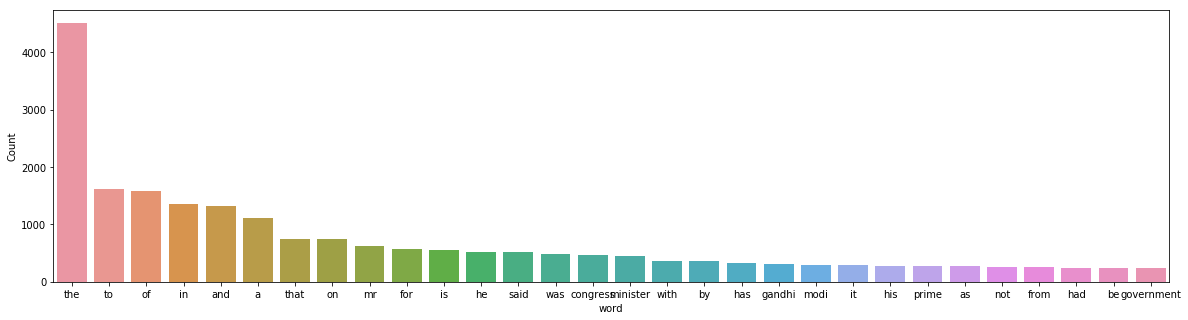

In [42]:
freq_words(df_news['text'])

In [43]:
#removing stop words from the list of articles

nlp = spacy.load('en_core_web_sm')

#excluding key stopwords to maintain the semantics of the text 
nlp.vocab['however'].is_stop = False
nlp.vocab['no'].is_stop = False
nlp.vocab['not'].is_stop = False
nlp.vocab['but'].is_stop = False


In [44]:
# tokenization using spaCy
def tokenization(x):
    reviews_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        reviews_tokens.append(temp)
    
    return reviews_tokens

In [45]:
df_news['tokenized_news'] = tokenization(df_news['text'])

100%|██████████| 170/170 [00:09<00:00, 17.45it/s]


In [46]:
    #function to remove STOPWORDS:
    def strip_stopwords(reviews):
        s = []
        for r in tqdm(reviews):
            s_2 = []
            for token in r:
                if nlp.vocab[token].is_stop == True:
                    continue
                else:
                    s_2.append(token)
            s.append(" ".join(s_2))    

        return s

In [47]:
df_news['news_cleaned'] = strip_stopwords(df_news['tokenized_news'])

100%|██████████| 170/170 [00:00<00:00, 1824.45it/s]


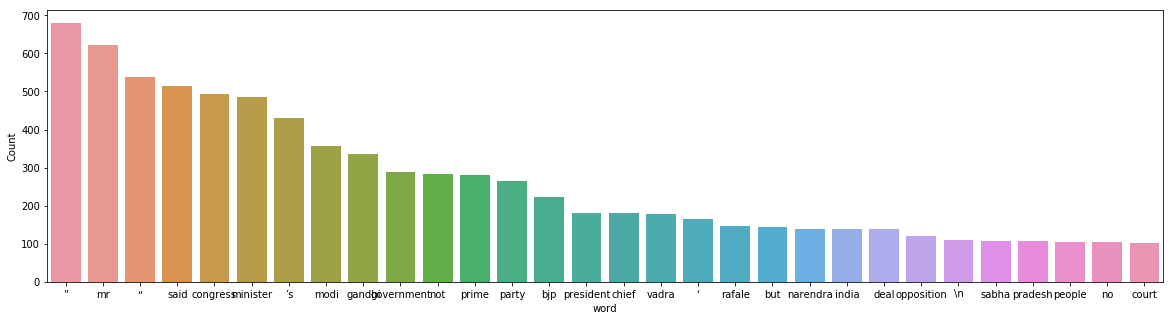

In [48]:
freq_words(df_news['news_cleaned'])

In [27]:
#congress is mentioned more than modi,gandhi,bjp,narendra

In [49]:
# remove 1 character terms (length == 1)
df_news['news_cleaned'] = df_news['news_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

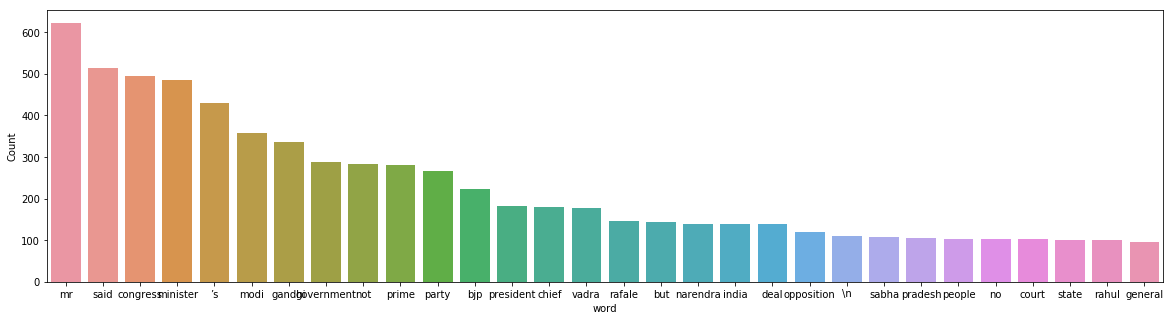

In [50]:
freq_words(df_news['news_cleaned'])

In [51]:
#wordcloud
#try to plot a word cloud 


In [53]:
news=df_news['text'].copy()

news.head()

0    \n vande bharat express or train 18’s air cond...
1    \nall the major opposition parties on monday c...
2    \nthe controversies surrounding the rafale dea...
3    \nalways in campaign mode distinguishing prime...
4    \ncongress president rahul gandhi launched a f...
Name: text, dtype: object

In [69]:
clean_news = df_news['news_cleaned'].copy()

In [76]:
clean_news.head()

0    \n vande bharat express train 18 ’s air condit...
1    \nall major opposition parties monday converge...
2    \nthe controversies surrounding rafale deal no...
3    \nalways campaign mode distinguishing prime mi...
4    \ncongress president rahul gandhi launched fre...
Name: news_cleaned, dtype: object

In [55]:
tokenize_pattern = "[A-Za-z-']+"

tokenizer = nltk.tokenize.RegexpTokenizer(pattern=tokenize_pattern)
news_tokens = [tokenizer.tokenize(rev.lower()) for rev in news]



In [62]:
from collections import Counter 
from wordcloud import STOPWORDS

In [63]:
for rev in news_tokens:
    for w in STOPWORDS:
        while True:
            try:
                rev.remove(w)
            except:
                break

In [64]:
news_token_all = [w for rev in news_tokens for w in rev]

In [65]:
len(news_token_all)

35102

In [66]:
word_count = Counter(news_token_all)

In [67]:
word_count.most_common(50)

[('n', 722),
 ('mr', 646),
 ('said', 564),
 ('congress', 514),
 ('minister', 488),
 ('s', 458),
 ('modi', 362),
 ('gandhi', 336),
 ('government', 298),
 ('prime', 280),
 ('party', 274),
 ('bjp', 226),
 ('will', 204),
 ('president', 182),
 ('chief', 180),
 ('vadra', 180),
 ('deal', 154),
 ('rafale', 146),
 ('narendra', 144),
 ('india', 142),
 ('opposition', 120),
 ('sabha', 110),
 ('pradesh', 108),
 ('state', 108),
 ('people', 104),
 ('court', 104),
 ('rahul', 100),
 ('one', 98),
 ('general', 96),
 ('country', 94),
 ('defence', 94),
 ('alleged', 92),
 ('leader', 92),
 ('meeting', 92),
 ('lok', 90),
 ('income', 90),
 ('two', 88),
 ('time', 88),
 ('corruption', 88),
 ('ambani', 88),
 ('told', 78),
 ('crore', 78),
 ('cbi', 76),
 ('former', 76),
 ('anil', 76),
 ('ms', 76),
 ('members', 76),
 ('election', 74),
 ('parties', 72),
 ('new', 70)]

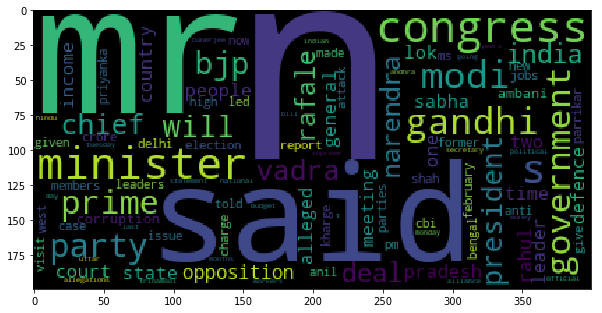

In [68]:
wc = WordCloud(max_words=100)
plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(word_count))

In [70]:
tokenize_pattern = "[A-Za-z-']+"

tokenizer = nltk.tokenize.RegexpTokenizer(pattern=tokenize_pattern)
clean_news_tokens = [tokenizer.tokenize(rev.lower()) for rev in clean_news]



In [71]:
clean_news_token_all = [w for rev in clean_news_tokens for w in rev]

In [72]:
len(clean_news_token_all)

33890

In [73]:
news_count = Counter(clean_news_token_all)
news_count.most_common(50)

[('n', 764),
 ('mr', 646),
 ('said', 564),
 ('congress', 514),
 ('minister', 488),
 ('s', 448),
 ('modi', 362),
 ('gandhi', 336),
 ('government', 298),
 ('not', 286),
 ('prime', 280),
 ('party', 274),
 ('bjp', 226),
 ('president', 182),
 ('chief', 180),
 ('vadra', 180),
 ('deal', 154),
 ('but', 146),
 ('rafale', 146),
 ('narendra', 144),
 ('india', 142),
 ('opposition', 120),
 ('no', 112),
 ('sabha', 110),
 ('pradesh', 108),
 ('state', 108),
 ('people', 104),
 ('court', 104),
 ('rahul', 100),
 ('general', 96),
 ('country', 94),
 ('defence', 94),
 ('alleged', 92),
 ('leader', 92),
 ('meeting', 92),
 ('lok', 90),
 ('income', 90),
 ('time', 88),
 ('corruption', 88),
 ('ambani', 88),
 ('told', 78),
 ('crore', 78),
 ('cbi', 76),
 ('the', 76),
 ('anil', 76),
 ('ms', 76),
 ('members', 76),
 ('election', 74),
 ('parties', 72),
 ('new', 70)]

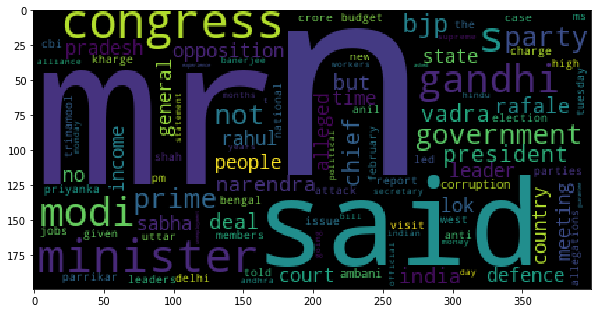

In [74]:
nc = WordCloud(max_words=100)
plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(news_count))

# TOPIC Extraction

In [89]:
import gensim

In [90]:
only_reviews = df_news.text

In [91]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews]

In [92]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [93]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]

In [94]:
dictionaries = gensim.corpora.Dictionary(tokens)

In [97]:
dictionaries.filter_extremes(no_below=10)

In [98]:
len(list(dictionaries))

100

In [99]:
dictionaries.save("/home/kinshuk/Documents/TEXTA.dict") # Use your own path

In [100]:
news_corpora = [dictionaries.doc2bow(t) for t in tokens]

In [101]:
gensim.corpora.MmCorpus.serialize("/home/kinshuk/Documents/TEXTA.dict",
                                  news_corpora)

In [102]:
tfidf_news = gensim.models.TfidfModel(news_corpora)
tfidf_corpus = tfidf_news[news_corpora]

In [103]:
lsi_model = gensim.models.lsimodel.LsiModel(tfidf_corpus,num_topics= 10, id2word= dictionaries)

In [105]:
lsi_model.print_topics(num_topics=25)

[(0,
  '0.265*"vadra" + 0.225*"deal" + 0.203*"rafale" + 0.173*"ambani" + 0.153*"bjp" + 0.145*"meeting" + 0.141*"anil" + 0.140*"opposition" + 0.137*"general" + 0.137*"crore"'),
 (1,
  '-0.381*"deal" + -0.356*"ambani" + -0.351*"rafale" + 0.338*"vadra" + -0.257*"anil" + -0.229*"crore" + -0.202*"defence" + 0.166*"ms" + 0.146*"general" + 0.138*"february"'),
 (2,
  '0.572*"vadra" + 0.228*"february" + -0.223*"west" + -0.216*"bengal" + -0.213*"shah" + -0.210*"banerjee" + -0.189*"opposition" + -0.187*"bjp" + 0.183*"case" + -0.146*"trinamool"'),
 (3,
  '-0.448*"jobs" + -0.232*"going" + 0.226*"banerjee" + 0.221*"west" + -0.216*"time" + 0.214*"bengal" + -0.208*"high" + 0.185*"ambani" + 0.175*"ms" + 0.171*"deal"'),
 (4,
  '0.452*"members" + -0.269*"jobs" + 0.257*"issue" + 0.213*"court" + 0.204*"case" + 0.195*"allegations" + 0.172*"cbi" + -0.167*"banerjee" + -0.166*"ms" + -0.159*"going"'),
 (5,
  '0.298*"case" + -0.267*"meeting" + 0.258*"delhi" + 0.246*"banerjee" + 0.229*"west" + 0.227*"court" + 0.2

In [ ]:
###Finito####